## Задание 1.

### Первая итерация:

Дефолтная модель. Предполагает, что predictor не был подвержен влиянию intervention (событие, после которого пытаемся оценить target по сравнению с потенциальным таргетом, если бы этого события не было). Кроме того, для дефолтной модели предполагается, что отношения между сериями, наблюдаемые в pre-period, не меняются в post-period. Используя эти предположения, модель тренируется в pre-period по предиктору оценивать таргет, а после intervention уже предсказывает потенциальные значения target, с которыми нам и хотелось бы сравнить настоящие значения target за post-period. Именно благодаря изначальным предположениям о том, что зависимость тайм-серий не меняется на протяжении всего времени, и что по predictor вообще можно оценивать таргет (потому что отношения реальных данных и белого шума так же могут успешно не меняться, но пользы нам от этого мало), и кроме того, что на predictor не влиял intervention, можно предполагать, что предсказанные данные таргета будут близки к данным, которые могли бы быть получены без вмешательства intervention. Дефолтные значения некоторых гиперпараметров: standardize.data=True -- по умолчания данные нормализуются, то есть модель становится нечувствительной к линейным трансформациям; nseasons=1 -- сезонный компонент не используется; dynamic.regression=False -- константные отношения между тайм-сериями. Из всего этого следуют очевидные границы применимости: если одно из предположений не выполняется -- применять не стоит.

### Вторая итерация:

CausalImpact использует bayesian structural time-series model, которая выглядит так:
$$y_t = Z_t^T \alpha_t + \epsilon_t$$
$$\alpha_{t+1} = T_t \alpha_t + R_t \eta_t$$
Дефолтная модель подразумевает статичный коэффициент зависимости между рядами и в этом случае: "a static regression can be written in state-space form by setting $Z_t = \beta^T x_t$ and $\alpha_t = 1$".
Подставим в модель:
$$y_t = x_t \beta^T + \epsilon_t$$
Здесь $x_t$ -- значения ряда-predictor, $y_t$ -- значения ряда-target. $\epsilon_t$ -- нормально-распределенный шум с нулевым средним.

### Третья итерация:

Таким образом, модель это описание ряда-таргета через ряд-предиктор, где значение таргета определяется как значение предиктора на коэффициент $\beta$, описывающий important features of the data, плюс некий шум.

## Задание 3.

### Первая итерация:

Intervention: улучшение качества поиска картинок. Цель: узнать увеличилась ли активность пользователей на основном поиске Яндекса. Target: количество поисковых запросов в единицу времени.
Далее есть несколько вариантов выбрать predictor.
Первый: можно попытаться выделить часть пользователей, на которых изменение не повлияло: например, тех, которые не пользуются поиском картинок и, соответственно, улучшений не заметили. Возможные проблемы заключаются в том, что надо думать, убирать ли этих пользователей из ряда-таргета. Казалось бы, да, надо убирать, но тогда мы уже будем оценивать активность на подмножестве маркета. Кроме того, некоторые параметры, например, такие как сезонность или тренд, у разных частей пользователей (в нашем случае, ищущих картинки и не ищущих) могут отличаться, на это тоже надо будет обратить внимание.
Второй вариант такой: можно в качестве предиктора рассмотреть количество поисковых запросов в других сервисах. С этим вариантом проблема в том, что улучшение в яндексе могло повлиять так же и на другие поисковые системы -- забрать у них часть пользователей. В этом случае итоговое различие между таргетом и предсказанием будет переоценено. Решением этой проблемы может быть нормализация разницы между таргетом и предсказанием на количество пользователей, перешедших из других поисковых систем. Тогда в этом случае придется как-то оценивать, насколько intervention "уронил" ряды-предикторы.

### Вторая итерация:

#### Замечание: Во втором варианте стоит уточнить, как получить данные о других поисковиках?
Ответ: Например, взять данные из Яндекс-браузера. Или найти поисковики, которые готовы предоставить данные сами.

#### Замечание: Чтобы заметить улучшение поиска картинок, человек не обязательно должен воспользоваться этим сервисом.
Вообще, качество поиска картинок очень субъективно. Так что если я намеренно не пользуюсь поиском картинок, а просто иногда вижу ту парочку картинок, которая вываливается вместе с основным результатом поиска, я вряд ли что-то замечу.  Тем более я ничего не замечу, если не пользуюсь яндексом вообще, а ищу только в гугле. Ну и с той же логикой можно сказать о пользователях яндекса -- даже если я заметила улучшение поиска картинок через основной поиск, я просто продолжу пользоваться яндексом.
Но тем не менее, давайте попробуем рассмотреть варианты, в которых человек мог заметить улучшение поиска картинок и при этом чаще начать искать что-то в основном поиске:
* Я иногда пользуюсь гуглом, иногда яндексом, увидела, что яндекс готов предложить картинки более релевантные, чем гугл, на основной странице поиска -- перешла на яндекс совсем. Теперь все запросы, которые я иногда вбивала в гугл, я вбиваю в яндекс.
* Я пользуюсь только яндексом, увидела, что картинки на основной странице стали больше соответствовать моим запросам -- стала искать в яндексе больше.
* Я пользуюсь в яндексе только поиском картинок, заметила, что стало лучше, -- решила попробовать использовать и основной поиск.

Далее можно попробовать рассмотреть ряды для каждого из вариантов, но такое ощущение, что у нас не наберется достаточно пользователей, которые соответствуют этим вариантом, потому что основная масса все-таки либо просто ничего не заметит, либо заметит, но это не отразится на их желании искать чаще. Поэтому мне кажется, что пользователи, подходящие под эти три варианта, просто смешаются с шумом в рядах.

#### Замечание: Есть ли у вас еще идеи о возможных рядах?
Ответ: Обычно перед тем, как выкатывают какие-то изменения, сначала делают A/B-тестирование. С одной стороны, CausalImpact предназначен для использования в тех случаях, когда A/B-тестирование невозможно. С другой -- в задании не сказано, что его не было. Так что можно пофантазировать и предположить, что его сделали и собирали данные не только из сервиса поиска картинок, но и с основного поиска. В таком случае можно сравнивать эти ряды: таргет -- ряд, где изменение работало, предиктор -- сервис без изменений.

In [1]:
library(CausalImpact)

Loading required package: bsts
Loading required package: BoomSpikeSlab
Loading required package: Boom
Loading required package: MASS

Attaching package: ‘Boom’

The following object is masked from ‘package:stats’:

    rWishart

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: xts


Пусть x -- серия с сезонностью, равной семи, и некоторым трендом. y -- как-то зависит от x, но после некоторого события сделаем прирост, равный пяти.

Warning message in trend + seasons:
“длина большего объекта не является произведением длины меньшего объекта”

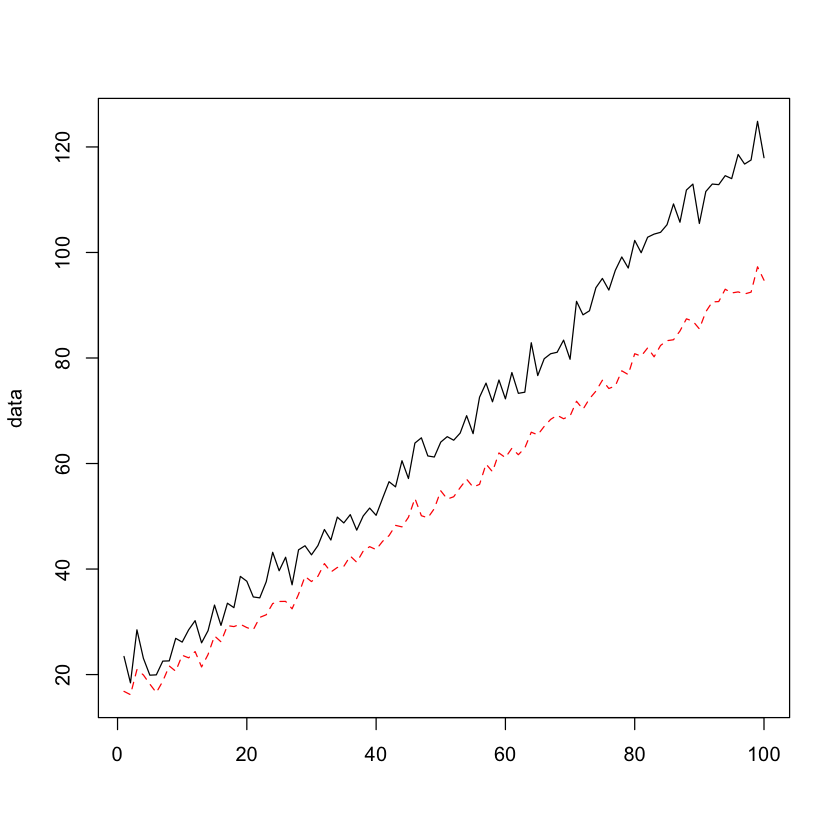

In [2]:
set.seed(0)
seasons <- rnorm(n = 7, sd = 1)
trend <- seq(from = 10, to = 45, length.out = 100) ** 1.2
x <- trend + seasons + rnorm(100)
y <- 1.2 * x + rnorm(100, sd = 2)
y[71:100] <- y[71:100] + 5
data <- cbind(y, x)
matplot(data, type = "l")

Для начала проверим такие данные на стандартной модели.

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   106            3166        
Prediction (s.d.)        100 (2.5)      3009 (75.4) 
95% CI                   [96, 105]      [2866, 3153]
                                                    
Absolute effect (s.d.)   5.2 (2.5)      157.2 (75.4)
95% CI                   [0.46, 10]     [13.67, 300]
                                                    
Relative effect (s.d.)   5.2% (2.5%)    5.2% (2.5%) 
95% CI                   [0.45%, 10%]   [0.45%, 10%]

Posterior tail-area probability p:   0.015
Posterior prob. of a causal effect:  98.5%

For more details, type: summary(impact, "report")



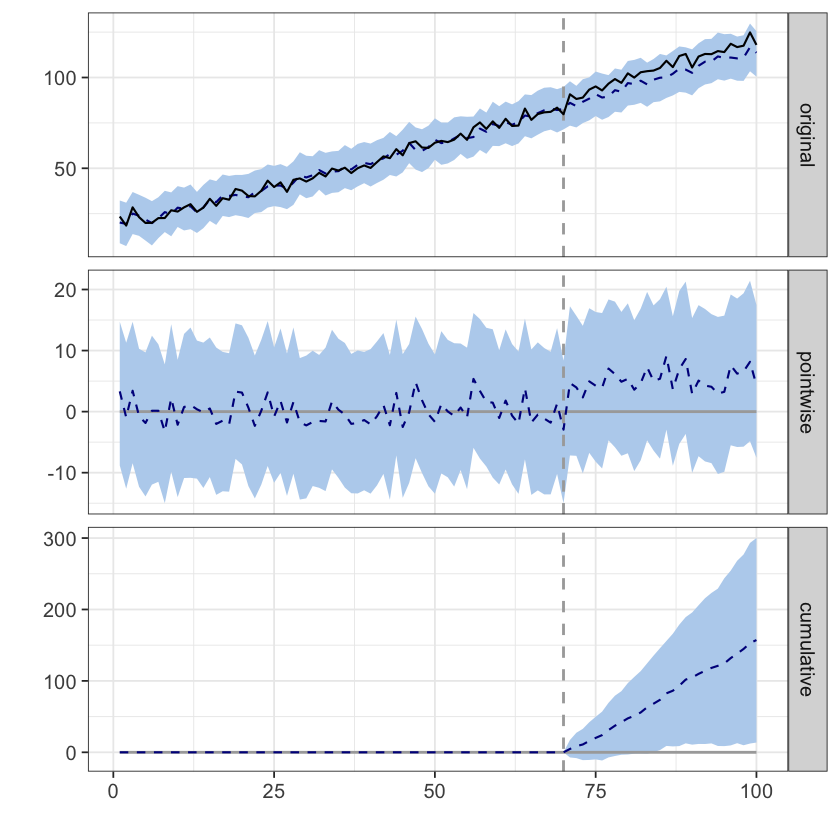

In [3]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Видно, что Absolute effect предсказан довольно точно -- 5,2.

Теперь добавим в модель сезонность, про которую мы изначально знали.

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average         Cumulative   
Actual                   106             3166         
Prediction (s.d.)        100 (2.6)       3007 (78.0)  
95% CI                   [95, 105]       [2851, 3164] 
                                                      
Absolute effect (s.d.)   5.3 (2.6)       159.8 (78.0) 
95% CI                   [0.097, 11]     [2.897, 315] 
                                                      
Relative effect (s.d.)   5.3% (2.6%)     5.3% (2.6%)  
95% CI                   [0.096%, 10%]   [0.096%, 10%]

Posterior tail-area probability p:   0.025
Posterior prob. of a causal effect:  97.5%

For more details, type: summary(impact, "report")



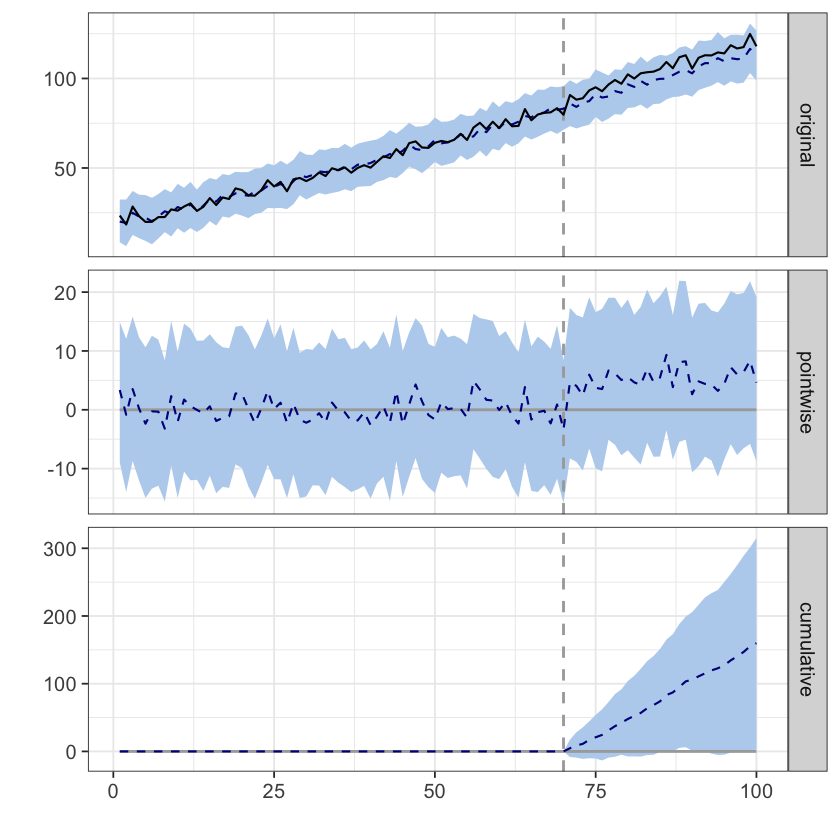

In [4]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period, model.args = list(nseasons = 7))
plot(impact)
summary(impact)

Absolute effect получился уже не таким точным, а доверительный интервал для него шире, чем для стандартной модели. Кроме того, наша уверенность в эффекте действия упала на один процент.

В предыдущем примере сезонными были оба ряда. Посмотрим теперь на случай, в котором ряд-predictor не обладает сезонностью.

Warning message in 1.2 * x + seasons:
“длина большего объекта не является произведением длины меньшего объекта”

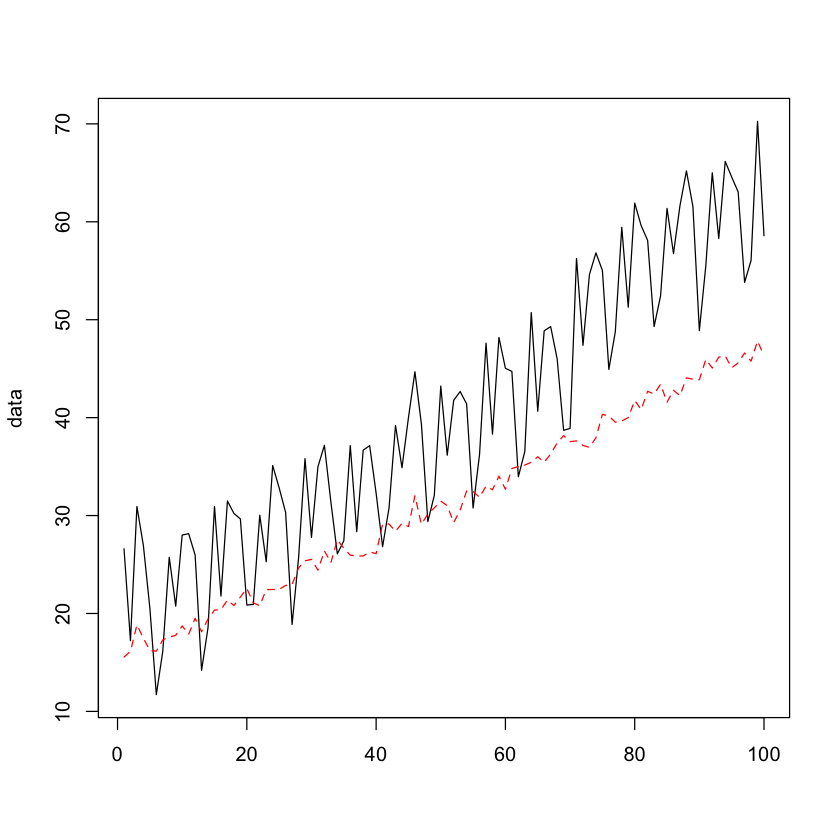

In [5]:
set.seed(0)
seasons <- rnorm(n = 7, sd = 5)
trend <- seq(from = 10, to = 25, length.out = 100) ** 1.2
x <- trend + rnorm(100)
y <- 1.2 * x + seasons + rnorm(100)
y[71:100] <- y[71:100] + 5
data <- cbind(y, x)
matplot(data, type = "l")

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average       Cumulative   
Actual                   57            1723         
Prediction (s.d.)        52 (1.2)      1569 (36.1)  
95% CI                   [50, 55]      [1497, 1641] 
                                                    
Absolute effect (s.d.)   5.1 (1.2)     154.1 (36.1) 
95% CI                   [2.7, 7.5]    [81.7, 225.4]
                                                    
Relative effect (s.d.)   9.8% (2.3%)   9.8% (2.3%)  
95% CI                   [5.2%, 14%]   [5.2%, 14%]  

Posterior tail-area probability p:   0.001
Posterior prob. of a causal effect:  99.9%

For more details, type: summary(impact, "report")



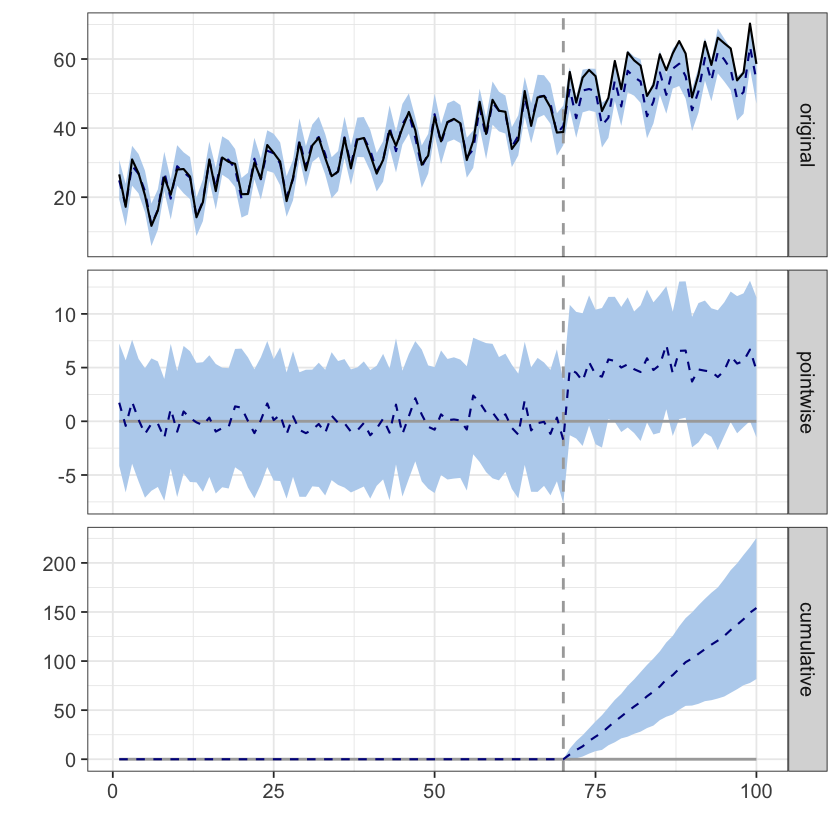

In [6]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period, model.args = list(nseasons = 7))
plot(impact)
summary(impact)

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average       Cumulative  
Actual                   57            1723        
Prediction (s.d.)        51 (1.9)      1534 (57.9) 
95% CI                   [47, 55]      [1423, 1648]
                                                   
Absolute effect (s.d.)   6.3 (1.9)     188.4 (57.9)
95% CI                   [2.5, 10]     [74.5, 300] 
                                                   
Relative effect (s.d.)   12% (3.8%)    12% (3.8%)  
95% CI                   [4.9%, 20%]   [4.9%, 20%] 

Posterior tail-area probability p:   0.00201
Posterior prob. of a causal effect:  99.79879%

For more details, type: summary(impact, "report")



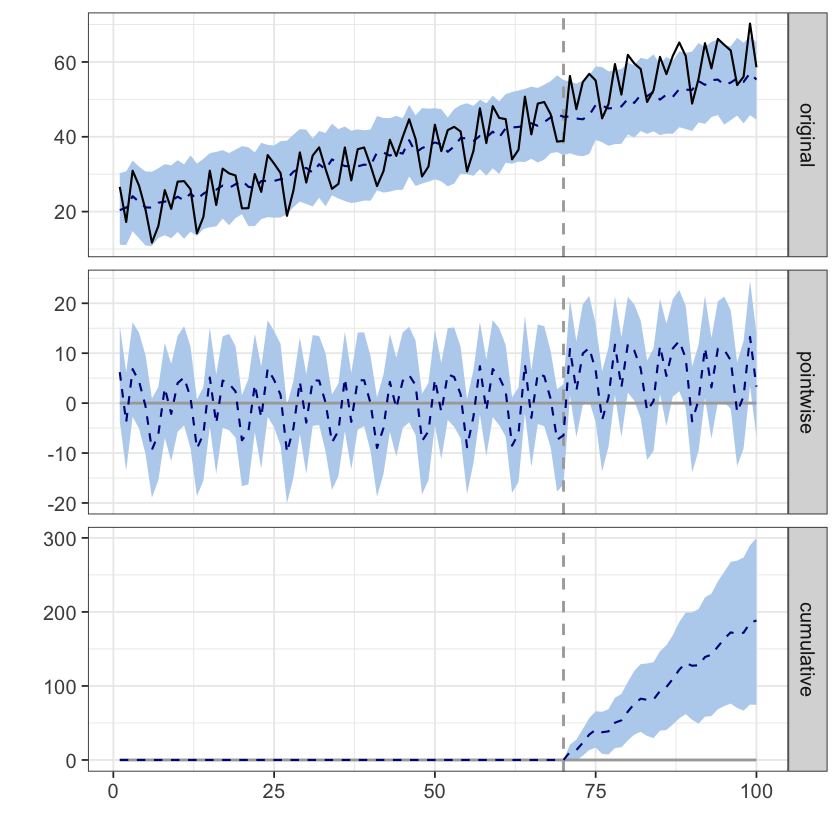

In [7]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

В данном примере видно, что если сезонность наблюдается только у таргет-переменной, то модель не справится, не зная о сезонности.

Теперь сделаем зависимость y от x не постоянной. И уберем сезонность для чистоты эксперимента.

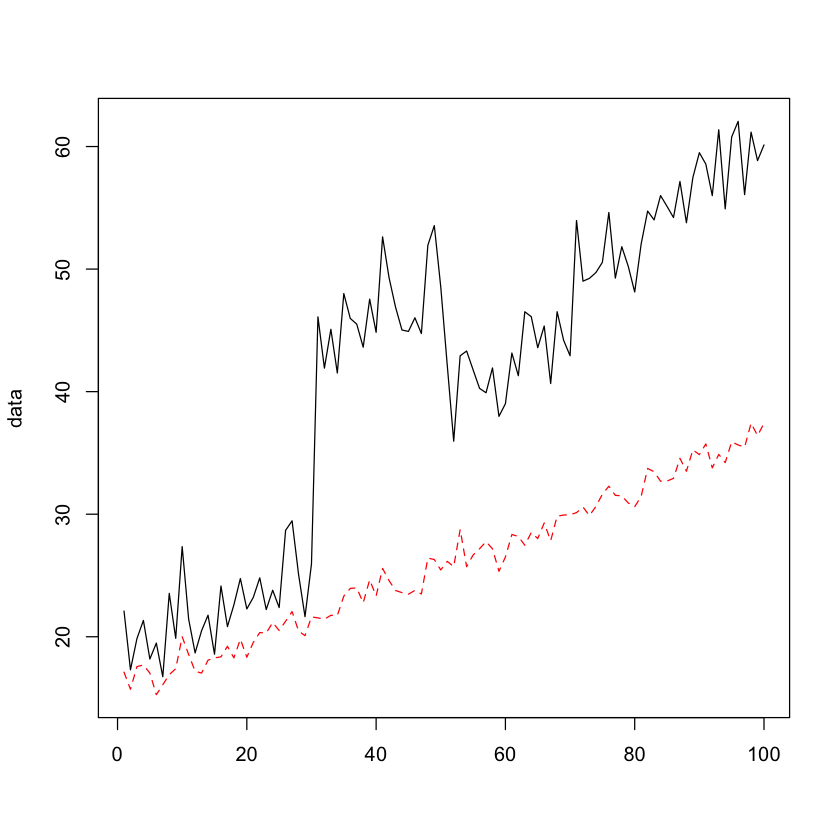

In [8]:
set.seed(0)
trend <- seq(from = 10, to = 20, length.out = 100) ** 1.2
x <- trend + rnorm(100)
y <- x
y[1:30] <- 1.2 * y[1:30] + rnorm(30, sd = 2)
y[31:50] <- 2 * y[31:50] + rnorm(20, sd = 2)
y[51:100] <- 1.5 * y[51:100] + rnorm(50, sd = 2)
y[71:100] <- y[71:100] + 5
data <- cbind(y, x)
matplot(data, type = "l")

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average          Cumulative      
Actual                   55               1650            
Prediction (s.d.)        59 (2.3)         1785 (70.2)     
95% CI                   [55, 64]         [1651, 1929]    
                                                          
Absolute effect (s.d.)   -4.5 (2.3)       -134.3 (70.2)   
95% CI                   [-9.3, -0.024]   [-278.7, -0.712]
                                                          
Relative effect (s.d.)   -7.5% (3.9%)     -7.5% (3.9%)    
95% CI                   [-16%, -0.04%]   [-16%, -0.04%]  

Posterior tail-area probability p:   0.0252
Posterior prob. of a causal effect:  97.48%

For more details, type: summary(impact, "report")



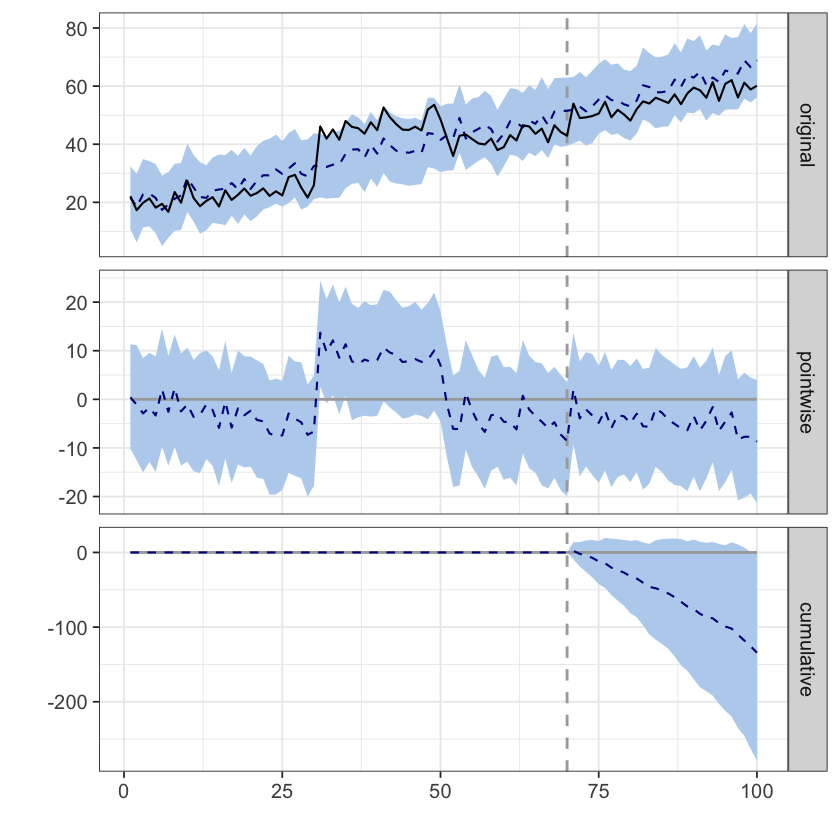

In [9]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Видно, что изменение мы не угадали, но ряд прогнозируем в целом неплохо. Теперь скажем модели, что коэффициенты зависимости не постоянны.

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average           Cumulative     
Actual                   55                1650           
Prediction (s.d.)        52 (276)          1552 (8283)    
95% CI                   [-524, 574]       [-15717, 17219]
                                                          
Absolute effect (s.d.)   3.3 (276)         98.3 (8283)    
95% CI                   [-519, 579]       [-15569, 17368]
                                                          
Relative effect (s.d.)   6.3% (534%)       6.3% (534%)    
95% CI                   [-1003%, 1119%]   [-1003%, 1119%]

Posterior tail-area probability p:   0.489
Posterior prob. of a causal effect:  51%

For more details, type: summary(impact, "report")



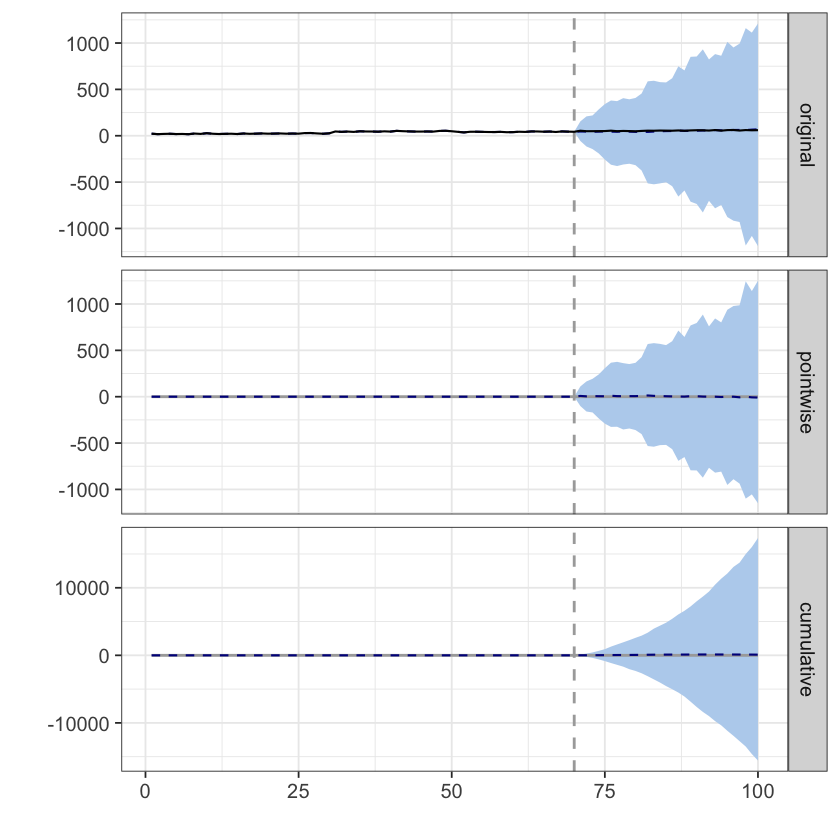

In [10]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period, model.args = list(dynamic.regression = TRUE))
plot(impact)
summary(impact)

Получилось что-то максимально странное: доверительные интервалы настолько широкие, что самих значений не видно. Саммари тоже не радует, особенно по сравнению со стандартной моделью.

Давайте теперь попробуем убрать данные с зависимостью, отличной от наблюдаемой на post-period.

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 50 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average       Cumulative   
Actual                   55            1650         
Prediction (s.d.)        49 (1.5)      1483 (44.2)  
95% CI                   [47, 52]      [1398, 1570] 
                                                    
Absolute effect (s.d.)   5.6 (1.5)     167.5 (44.2) 
95% CI                   [2.7, 8.4]    [80.7, 252.6]
                                                    
Relative effect (s.d.)   11% (3%)      11% (3%)     
95% CI                   [5.4%, 17%]   [5.4%, 17%]  

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8994%

For more details, type: summary(impact, "report")



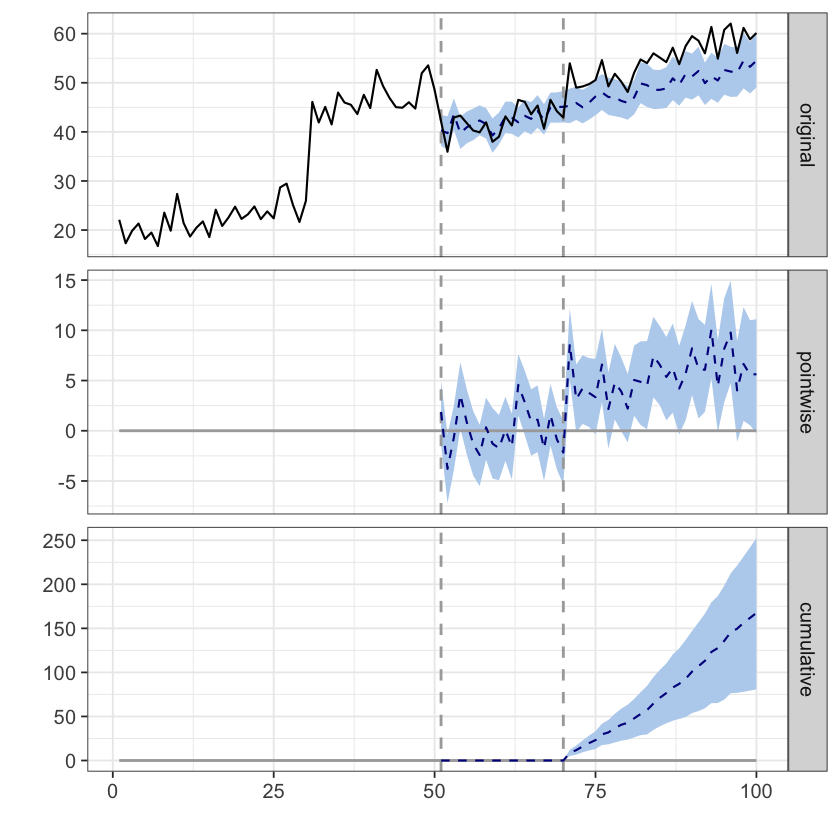

In [11]:
set.seed(0)
pre.period <- c(51, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Даже несмотря на малое количество значений в pre-period, получилось гораздо лучше, чем в предыдущих случаях.

Если данных в pre-period, совпадающих по зависимости с post-period не хватает, но про зависимость на каждом участке мы знаем, можно попытаться поколдовать над данными: например, привести к одной зависимости. Давайте посмотрим, что получится.

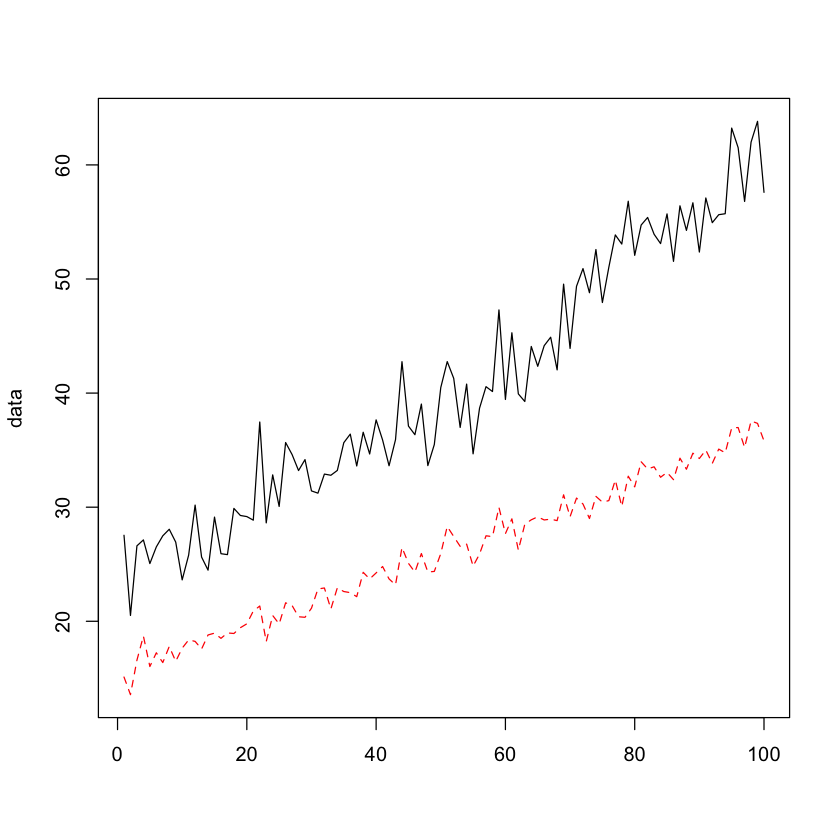

In [15]:
trend <- seq(from = 10, to = 20, length.out = 100) ** 1.2
x <- trend + rnorm(100)
y <- x
y[1:30] <- 1.2 * y[1:30] + rnorm(30, sd = 2)
y[31:50] <- 2 * y[31:50] + rnorm(20, sd = 2)
y[51:100] <- 1.5 * y[51:100] + rnorm(50, sd = 2)
y[71:100] <- y[71:100] + 5

y[1:30] <- 1.5 * y[1:30] / 1.2
y[31:50] <- 1.5 * y[31:50] / 2

data <- cbind(y, x)
matplot(data, type = "l")

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average       Cumulative   
Actual                   55            1649         
Prediction (s.d.)        50 (0.97)     1493 (29.14) 
95% CI                   [48, 52]      [1438, 1548] 
                                                    
Absolute effect (s.d.)   5.2 (0.97)    155.7 (29.14)
95% CI                   [3.4, 7]      [101.0, 211] 
                                                    
Relative effect (s.d.)   10% (2%)      10% (2%)     
95% CI                   [6.8%, 14%]   [6.8%, 14%]  

Posterior tail-area probability p:   0.001
Posterior prob. of a causal effect:  99.9%

For more details, type: summary(impact, "report")



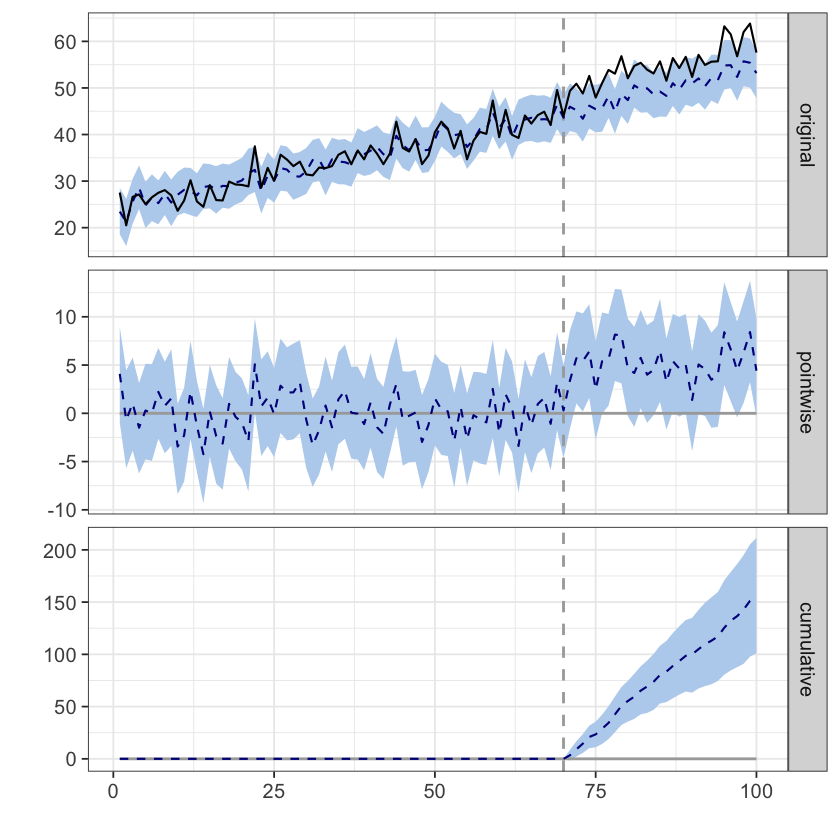

In [16]:
set.seed(0)
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Кажется, получилось вполне неплохо.

Итого, правила, которые надо учитывать при построении модели c дополнительными параметрами:
* Параметр динамики. При использовании динамики модель всегда очень переобучается, расширяются доверительные интервалы. Поэтому в целом правило сводится к тому, чтобы попытаться не использовать этот параметр. Для этого либо:
    * Учитывать только часть, совпадающую по зависимости с post-period.
    * Пробовать привести данные к виду, в котором зависимость постоянна.
* Параметр сезонности:
    * Использовать, когда есть в target, но отсутствует в predictor.
    * Не использовать, когда сезонность есть и в target, и в predictor.

А вот еще забавная штука, если использовать много точек для обучения.
Пусть есть predictor, который совершенно не связан с target:

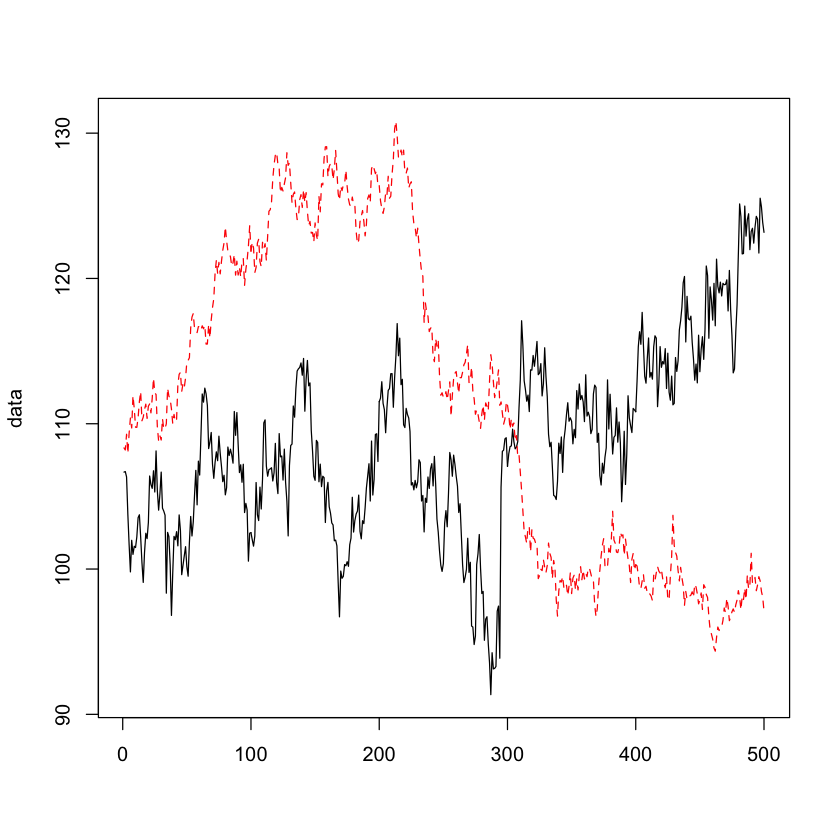

In [18]:
total.points <- 500
marketing.starts <- 295

set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = total.points)
y <- 1.2 * x1 + rnorm(total.points)
y[marketing.starts:total.points] <- y[marketing.starts:total.points] + 10

set.seed(10)
x2 <- 100 + arima.sim(model = list(ar = 0.999), n = total.points)
data <- cbind(y, x2)
matplot(data, type = "l")

Warning message:
“Removed 500 rows containing missing values (geom_path).”Warning message:
“Removed 1000 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average       Cumulative    
Actual                   114           23425         
Prediction (s.d.)        94 (8.1)      19425 (1660.9)
95% CI                   [79, 112]     [16341, 22984]
                                                     
Absolute effect (s.d.)   19 (8.1)      4000 (1660.9) 
95% CI                   [2.1, 34]     [441.2, 7085] 
                                                     
Relative effect (s.d.)   21% (8.6%)    21% (8.6%)    
95% CI                   [2.3%, 36%]   [2.3%, 36%]   

Posterior tail-area probability p:   0.01585
Posterior prob. of a causal effect:  98.415%

For more details, type: summary(impact, "report")



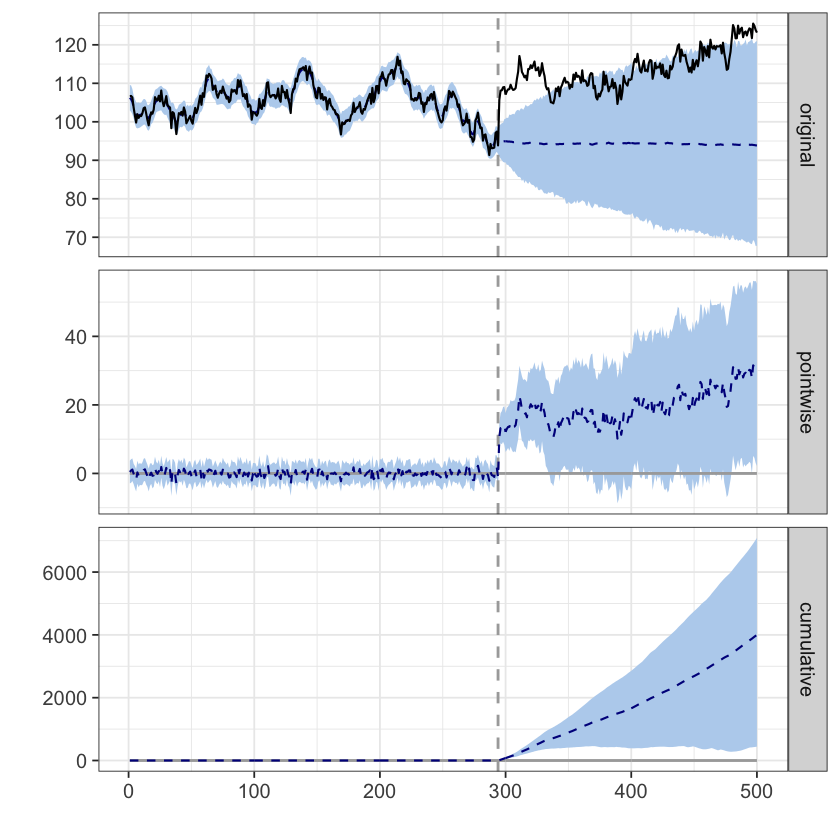

In [20]:
set.seed(0)
pre.period <- c(1, marketing.starts-1)
post.period <- c(marketing.starts, total.points)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Тем не менее, мы неплохо на нем обучились. Казалось бы, так быть не должно. Вот, как можно исправить это с помощью других параметров модели:

Warning message:
“Removed 500 rows containing missing values (geom_path).”Warning message:
“Removed 1000 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average       Cumulative    
Actual                   114           23425         
Prediction (s.d.)        98 (0.77)     20150 (158.54)
95% CI                   [96, 99]      [19847, 20459]
                                                     
Absolute effect (s.d.)   16 (0.77)     3275 (158.54) 
95% CI                   [14, 17]      [2967, 3579]  
                                                     
Relative effect (s.d.)   16% (0.79%)   16% (0.79%)   
95% CI                   [15%, 18%]    [15%, 18%]    

Posterior tail-area probability p:   0.001
Posterior prob. of a causal effect:  99.8999%

For more details, type: summary(impact, "report")



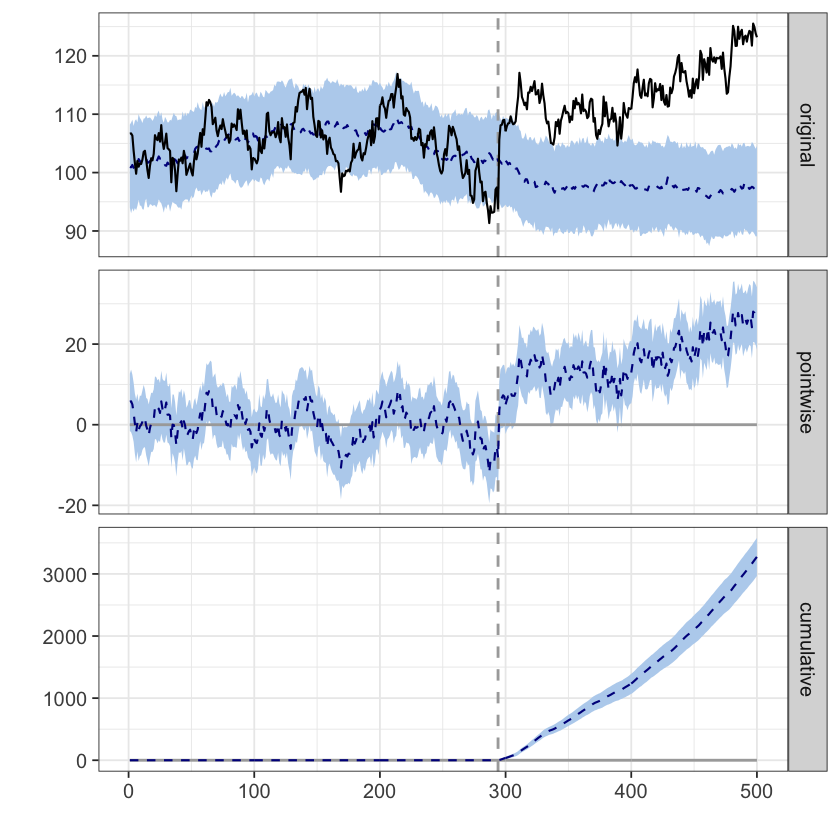

In [22]:
set.seed(0)
impact <- CausalImpact(data, pre.period, post.period, model.args = list(prior.level.sd = 0.001))
plot(impact)
summary(impact)